In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [2]:
# Read the CSV file to a Pandas DataFrame (DF) called data
data = pd.read_csv('NC_policing.csv')

# Overall Data Inspection

In [3]:
data.head()

,state,stop_date,driver_gender,driver_age,driver_race_raw,driver_race,violation,search_type,contraband_found,stop_outcome,search_basis,officer_id,drugs_related_stop,district
0,NC,2000-07-31,M,23.0,W N,White,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3
1,NC,2000-07-31,F,29.0,W N,White,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3
2,NC,2000-07-31,F,49.0,B N,Black,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3
3,NC,2000-07-31,M,29.0,B N,Black,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3
4,NC,2000-07-31,M,24.0,U H,Hispanic,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3


In [4]:
# drop non-relevant variables --> e.g. officer_id will not improve the models
data = data.drop(columns=['stop_date','driver_race_raw','officer_id','district', 'state','drugs_related_stop'])
data

,driver_gender,driver_age,driver_race,violation,search_type,contraband_found,stop_outcome,search_basis
0,M,23.0,White,Speeding,No Search Conducted,False,Arrest,No Search Conducted
1,F,29.0,White,Speeding,No Search Conducted,False,Arrest,No Search Conducted
2,F,49.0,Black,Speeding,No Search Conducted,False,Arrest,No Search Conducted
3,M,29.0,Black,Speeding,No Search Conducted,False,Arrest,No Search Conducted
4,M,24.0,Hispanic,Speeding,No Search Conducted,False,Arrest,No Search Conducted
...,...,...,...,...,...,...,...,...
402082,M,18.0,White,Speeding,Probable Cause,True,Arrest,Observation Suspected Contraband
402083,F,21.0,Black,Registration/plates,Incident to Arrest,False,Arrest,Other Official Info
402084,F,29.0,White,Speeding,Incident to Arrest,False,Arrest,Observation Suspected Contraband
402085,F,18.0,White,Other,Probable Cause,True,Arrest,Observation Suspected Contraband


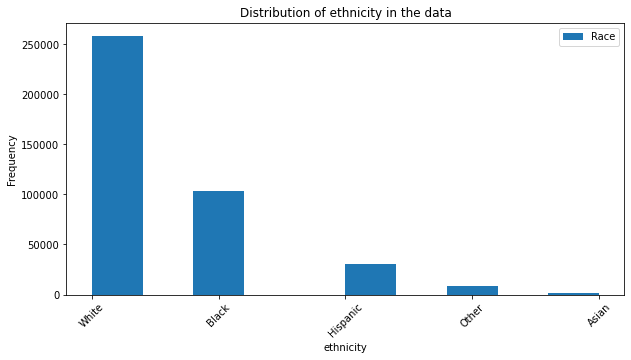

In [5]:
plt.figure(figsize=(10,5))
plt.hist(data['driver_race'], label='Race')
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('ethnicity')
plt.xticks(rotation=45)
plt.title("Distribution of ethnicity in the data")
plt.show()

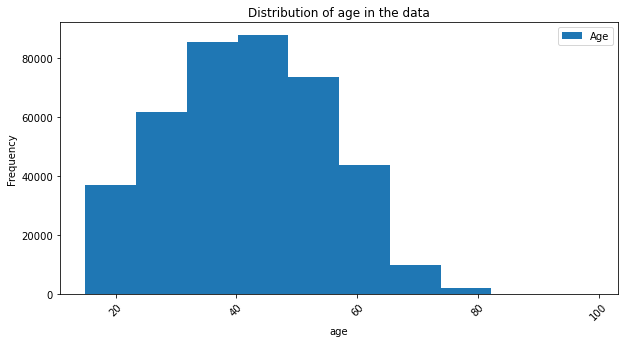

In [6]:
plt.figure(figsize=(10,5))
plt.hist(data['driver_age'], label='Age')
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('age')
plt.xticks(rotation=45)
plt.title("Distribution of age in the data")
plt.show()

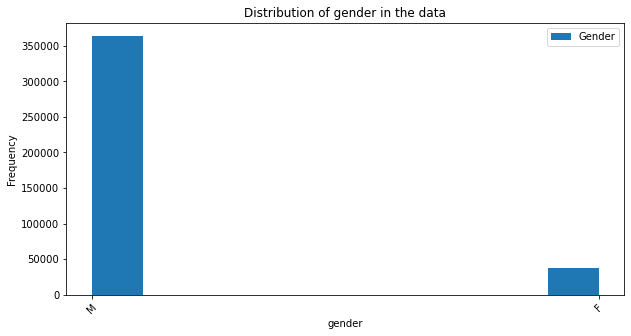

In [7]:
plt.figure(figsize=(10,5))
plt.hist(data['driver_gender'], label='Gender')
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('gender')
plt.xticks(rotation=45)
plt.title("Distribution of gender in the data")
plt.show()

In [8]:
def print_unique(data, col_names):
    for col in col_names:
        print(col, ': ', data[col].unique())

In [9]:
#unique features of different variables
columns = ['driver_gender', 'driver_age', 'driver_race', 'violation', 'search_type',
           'contraband_found', 'stop_outcome', 'search_basis']
print_unique(data, columns)

driver_gender :  ['M' 'F']
driver_age :  [23. 29. 49. 24. 21. 33. 16. 28. 39. 68. 20. 40. 50. 57. 38. 46. 34. 44.
 22. 36. 53. 32. 15. 27. 26. 41. 48. 25. 47. 42. 52. 17. 76. 61. 31. 30.
 64. 37. 19. 51. 18. 35. 59. 73. 43. 45. 66. 65. 54. 58. 55. 75. 63. 56.
 60. 81. 62. 77. 67. 69. 87. 70. 71. 78. 74. 85. 72. 79. 93. 80. 89. nan
 82. 84. 91. 83. 90. 88. 86. 92. 98. 99. 94. 96.]
driver_race :  ['White' 'Black' 'Hispanic' 'Other' 'Asian']
violation :  ['Speeding' 'DUI' 'Equipment' 'Seat belt' 'Other' 'Registration/plates'
 'Safe movement' 'Stop sign/light']
search_type :  ['No Search Conducted' 'Protective Frisk' 'Incident to Arrest' 'Consent'
 'Probable Cause' 'Warrant']
contraband_found :  [False  True]
stop_outcome :  ['Arrest' 'No Action']
search_basis :  ['No Search Conducted' 'Observation Suspected Contraband'
 'Erratic Suspicious Behaviour' 'Other Official Info'
 'Suspicious Movement' 'Witness Observation' 'Informant Tip'
 'Observation Suspected Contraband,Other Official Info'
 

# Encoding

In [10]:
## encoding different races ##
X_race = data[['driver_race']]
X_race = pd.get_dummies(X_race, prefix=['driver_race'])
X_race.head()

,driver_race_Asian,driver_race_Black,driver_race_Hispanic,driver_race_Other,driver_race_White
0,0,0,0,0,1
1,0,0,0,0,1
2,0,1,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0


In [11]:
## encoding different kinds of violation ##
X_violation = data[['violation']]
X_violation = pd.get_dummies(X_violation, prefix=['violation'])
X_violation.head()

,violation_DUI,violation_Equipment,violation_Other,violation_Registration/plates,violation_Safe movement,violation_Seat belt,violation_Speeding,violation_Stop sign/light
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0


In [12]:
## encoding binary variables (gender, contraband_found, stop_outcome) ##

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoding_df = pd.DataFrame()

features = ['driver_gender', 'contraband_found', 'stop_outcome']
X_binary = data[features].copy()

for feature in features:
    #X_binary[feature].values[:] = encoder.fit_transform(X_binary[feature])
    X_binary.loc[:, feature] = encoder.fit_transform(X_binary[feature])
    df = pd.DataFrame(data=encoder.transform(encoder.classes_), index=encoder.classes_, columns=["Coding"])
    encoding_df = pd.concat([encoding_df,df])
encoding_df

X_binary.head()

,driver_gender,contraband_found,stop_outcome
0,1,0,0
1,0,0,0
2,0,0,0
3,1,0,0
4,1,0,0


In [13]:
## encoding search type and search basis ## -> Due to many features we decided to merge features into binary variables.
                                             # Either no search has been conducted (0) or a reason for search existed (1)

def replace_values(column, important_data):
    
    uniques = data[column].unique()
    replacement = {}
    
    for i in range (len(uniques)):
        if uniques[i] == important_data:
            replacement[uniques[i]] = 0
        else:
            replacement[uniques[i]] = 1 
            
    data[column] = data[column].replace(replacement)
    return data[column]
    
X_search_type  = replace_values('search_type', "No Search Conducted")
X_search_basis = replace_values('search_basis', "No Search Conducted")

In [14]:
## encode age ## -> to encode age we splitted the variable into different subgroups (21-29, 30-39, ...)

bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['21-29', '30-39', '40-49', '50-59', '60-69', '70+']
X_driver_age = pd.cut(data.driver_age, bins, labels = labels,include_lowest = True)
X_driver_age = pd.get_dummies(X_driver_age, prefix='age')
X_driver_age.head()

,age_21-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70+
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,1,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


# Feature Inspection

In [15]:
#combining of the different encoded variables
data_encoded = pd.concat((X_binary, X_race, X_violation,X_search_type,X_search_basis,X_driver_age ), axis=1)
data_encoded.head()

,driver_gender,contraband_found,stop_outcome,driver_race_Asian,driver_race_Black,driver_race_Hispanic,driver_race_Other,driver_race_White,violation_DUI,violation_Equipment,...,violation_Speeding,violation_Stop sign/light,search_type,search_basis,age_21-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70+
0,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [16]:
#detecting variables with high correlation -> threshold is set at 0.7; variables with perfect correlation of 1 aren't shown here
corrMatrix = data_encoded.corr()
#print (corrMatrix)
#print out the highly correlated pairs
def corr_values(corrMatrix, threshold):
    highly_correlated = {}
  
    for i in range(len(corrMatrix)):
        for j in range(len(corrMatrix)):
            if abs(float(corrMatrix.iloc[i,j])) > threshold and abs(float(corrMatrix.iloc[i,j])) <  1:
                colName = corrMatrix.columns[i]
                rowName = corrMatrix.index[j]
                highly_correlated[colName] = rowName
    print(highly_correlated) 
    
    # the code prints duplicate correlations and doesn't have some of the ones over the threshold

corr_values(corrMatrix, 0.7)

{'stop_outcome': 'violation_Other', 'driver_race_Black': 'driver_race_White', 'driver_race_White': 'driver_race_Black', 'violation_Other': 'stop_outcome'}


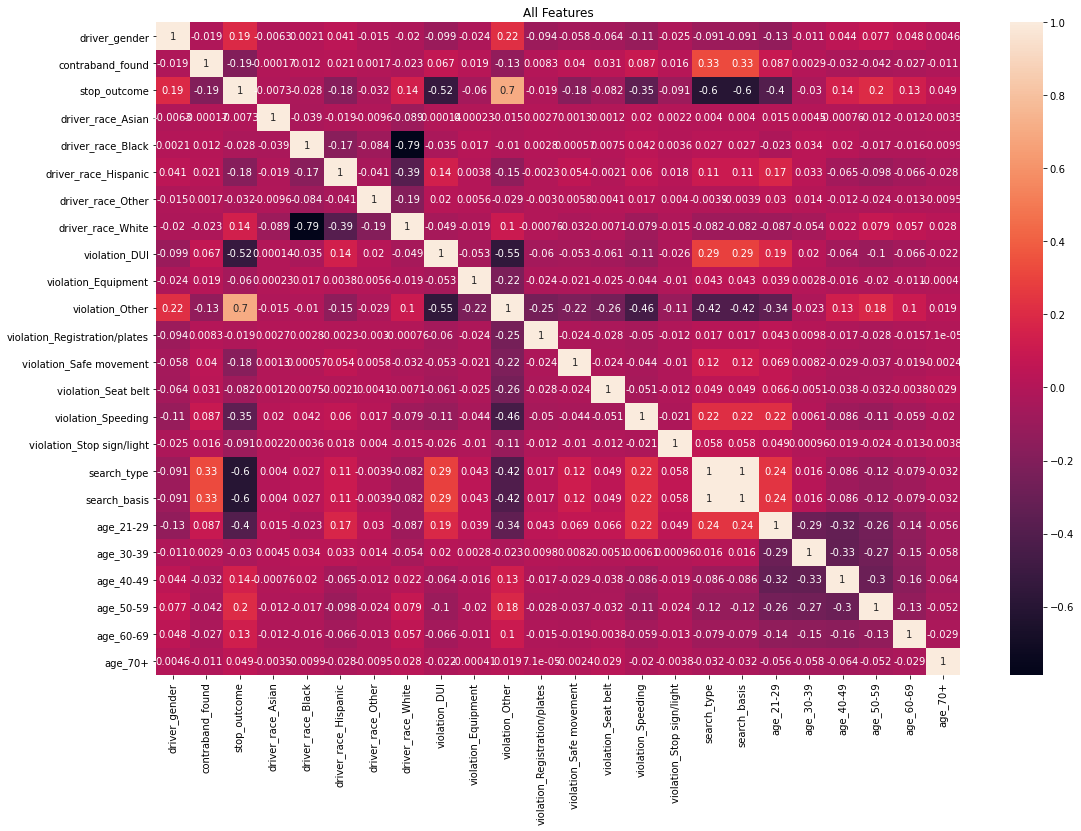

In [17]:
# Correlation Matrix shows that search_type and search_basis have perfect correlation (1)
f, ax = plt.subplots(figsize=(18, 12))
sn.heatmap(corrMatrix, annot=True)
ax.set_title('All Features')
plt.show()
f.savefig('All Features.jpg',
          format='jpeg',
          dpi=100,
          bbox_inches='tight')

# Selecting Variables

In [18]:
#Check for missing variables
#data_encoded1.describe()
data_encoded.isnull().sum()

driver_gender                    0
contraband_found                 0
stop_outcome                     0
driver_race_Asian                0
driver_race_Black                0
driver_race_Hispanic             0
driver_race_Other                0
driver_race_White                0
violation_DUI                    0
violation_Equipment              0
violation_Other                  0
violation_Registration/plates    0
violation_Safe movement          0
violation_Seat belt              0
violation_Speeding               0
violation_Stop sign/light        0
search_type                      0
search_basis                     0
age_21-29                        0
age_30-39                        0
age_40-49                        0
age_50-59                        0
age_60-69                        0
age_70+                          0
dtype: int64

In [19]:
#dropping search_basis due to perfect correlation with search_type
data_encoded_selected = data_encoded.drop(columns=['search_basis'])

In [20]:
#defining Variables for Model
X = data_encoded_selected.drop('stop_outcome', axis=1)
y = data_encoded_selected.stop_outcome

In [21]:
from sklearn.model_selection import train_test_split

# Split the data into training and test set
# test_size=0.3: 70% training set, 30% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=350)

# Cross validation of Decision Tree model

In [22]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores

In [23]:
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

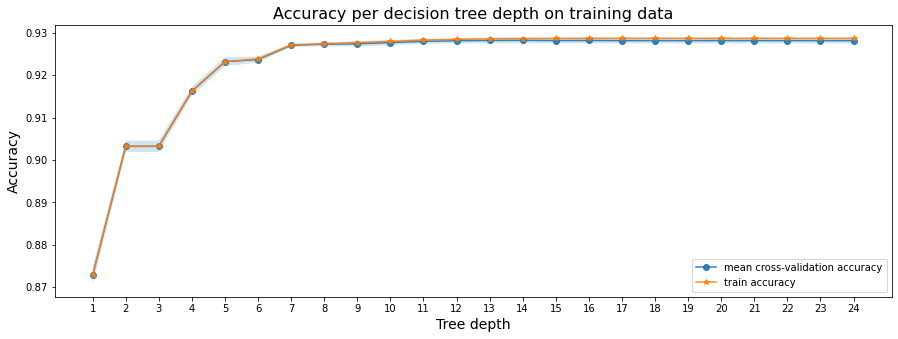

In [24]:
# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

In [25]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The depth-14 tree achieves the best mean cross-validation accuracy 92.82065 +/- 0.03486% on training dataset


In [26]:
# function for training and evaluating a tree
def run_single_tree(X_train, y_train, X_test, y_test, depth):
    model = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    print('Single tree depth: ', depth)
    print('Accuracy, Training Set: ', round(accuracy_train*100,5), '%')
    print('Accuracy, Test Set: ', round(accuracy_test*100,5), '%')
    return accuracy_train, accuracy_test
  

# train and evaluate a 14-depth tree
sm_best_tree_accuracy_train, sm_best_tree_accuracy_test = run_single_tree(X_train, y_train, 
                                                                          X_test, y_test, 
                                                                          sm_best_tree_depth)

Single tree depth:  14
Accuracy, Training Set:  92.86222 %
Accuracy, Test Set:  92.87141 %


# Optimized Decision Tree

In [27]:
#building decision tree model
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Maximum depth of the tree
#md=4
# The minimum number of samples required to split an internal node
mss=2
# Maximum number of allowed leaf nodes
mln=4

# Create an instance of the decision tree classifier with the predefined parameters
dct = DecisionTreeClassifier(random_state=42, max_depth=sm_best_tree_depth, min_samples_split=mss, criterion='gini')

# Train the model using the training set
dct.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=14, random_state=42)

In [28]:
#Check for Over/Underfitting
print('Training set score: {:.4f}'.format(dct.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(dct.score(X_test, y_test)))

Training set score: 0.9286
Test set score: 0.9287


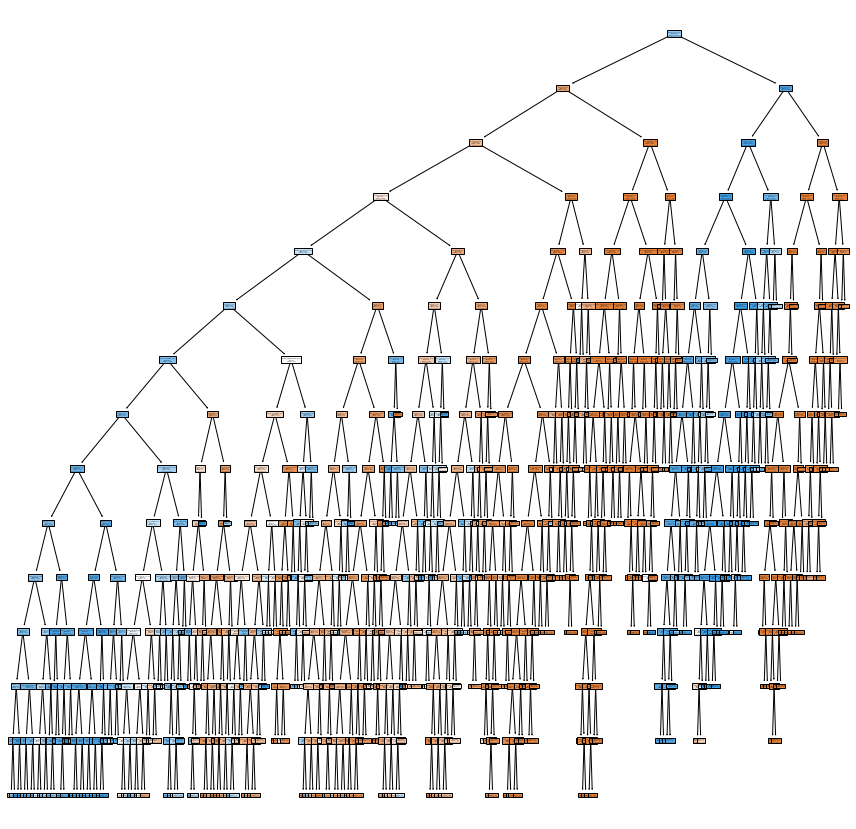

In [29]:
# Plot a graphical representation of the splits within the grown decision tree
from matplotlib import pyplot as plt

plt.figure(figsize=[15,15])
plot_tree(dct, filled=True, feature_names=X_train.columns)
plt.show()

<Figure size 432x288 with 0 Axes>

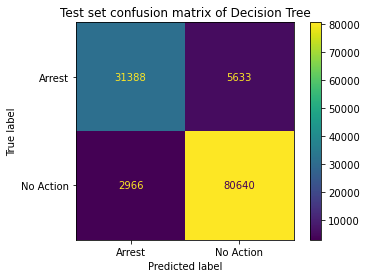

In [30]:
from sklearn.metrics import plot_confusion_matrix

# Plot the confusion matrix for the test set for the desicion tree classifier
plt.figure()
plot_confusion_matrix(dct, X_test, y_test, display_labels=encoder.classes_)
plt.title('Test set confusion matrix of Decision Tree')
plt.show()

In [31]:
from sklearn.metrics import confusion_matrix
tn_dct, fp_dct, fn_dct, tp_dct = confusion_matrix(y_test, dct.predict(X_test)).ravel()

In [32]:
from sklearn.metrics import classification_report

#Print Classifacation Report 
y_pred_test_dct = dct.predict(X_test)
print(classification_report(y_test, y_pred_test_dct , target_names=['Arrest', 'No Arrest']))

              precision    recall  f1-score   support

      Arrest       0.91      0.85      0.88     37021
   No Arrest       0.93      0.96      0.95     83606

    accuracy                           0.93    120627
   macro avg       0.92      0.91      0.91    120627
weighted avg       0.93      0.93      0.93    120627



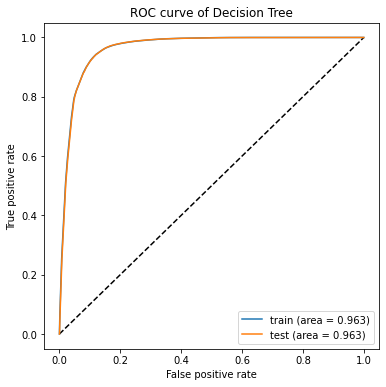

In [33]:
from sklearn.metrics import roc_curve, auc

#Calculate the false positive and true positive rates for training and test set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, dct.predict_proba(X_train)[:, 1])
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, dct.predict_proba(X_test)[:, 1])

#print(thresholds_train)
#print(thresholds_test)

#Calculate the area under the curve
auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

#Plot the ROC curve
plt.figure(figsize=[6,6])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_train, tpr_train, label='train (area = {:.3f})'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='test (area = {:.3f})'.format(auc_test))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve of Decision Tree')
plt.legend(loc='lower right')
plt.show()

# Fairness Metrices for the Decision Tree

<Figure size 432x288 with 0 Axes>

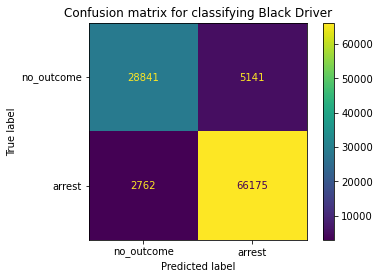

<Figure size 432x288 with 0 Axes>

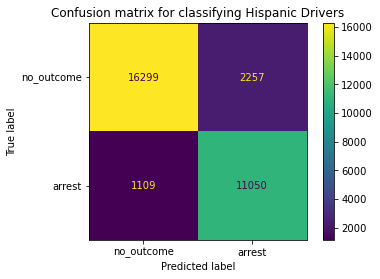

<Figure size 432x288 with 0 Axes>

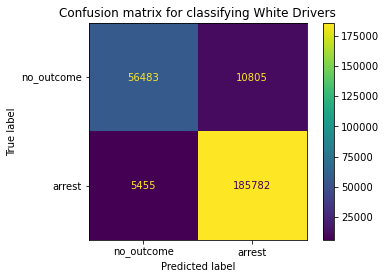

In [34]:
#1. measuring fairness based on black and hispanic racial variables
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_true = data_encoded_selected['stop_outcome']
y_pred_dct = dct.predict(data_encoded_selected.drop('stop_outcome', axis=1))

group_a = data_encoded_selected['driver_race_Black'] == 1
group_b = data_encoded_selected['driver_race_Hispanic'] == 1
group_c = data_encoded_selected['driver_race_White'] == 1

cm_a = confusion_matrix(y_true[group_a], y_pred_dct[group_a])
cm_b = confusion_matrix(y_true[group_b], y_pred_dct[group_b])
cm_c = confusion_matrix(y_true[group_c], y_pred_dct[group_c])

tn_a, fp_a, fn_a, tp_a = cm_a.ravel()
tn_b, fp_b, fn_b, tp_b = cm_b.ravel()
tn_c, fp_c, fn_c, tp_c = cm_b.ravel()


plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix=cm_a, display_labels=['no_outcome','arrest'])
disp.plot()
#plt.xticks(rotation=30)
plt.grid(False)
plt.title("Confusion matrix for classifying Black Driver")
plt.show()

plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix=cm_b, display_labels=['no_outcome','arrest'])
disp.plot()
#plt.xticks(rotation=30)
plt.grid(False)
plt.title("Confusion matrix for classifying Hispanic Drivers")
plt.show()

plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix=cm_c, display_labels=['no_outcome','arrest'])
disp.plot()
#plt.xticks(rotation=30)
plt.grid(False)
plt.title("Confusion matrix for classifying White Drivers")
plt.show()

In [35]:
def independence(tn, fp, fn, tp):
    
    output = (tp + fp) / (tn + fp + fn + tp)

    return output

In [36]:
independence_a = independence(tn_a, fp_a, fn_a, tp_a)
independence_b = independence(tn_b, fp_b, fn_b, tp_b)
independence_c = independence(tn_c, fp_c, fn_c, tp_c)

print('Independence Black:\t',independence_a)
print('Independence Hispanic:\t',independence_b)
print('Independence White:\t',independence_c)
print('Difference Black & Hispanic:\t',independence_a-independence_b)
print('Difference Hispanic & White:\t',independence_b-independence_c)
print('Difference Black & White:\t',independence_a-independence_c)

Independence Black:	 0.6929332776260944
Independence Hispanic:	 0.4332410874165717
Independence White:	 0.4332410874165717
Difference Black & Hispanic:	 0.25969219020952267
Difference Hispanic & White:	 0.0
Difference Black & White:	 0.25969219020952267


In [37]:
def separation(tn, fp, fn, tp):

    Y_1 = tp / (tp + fp)
    Y_0 = tn / (tn + fn)
    
    return Y_1, Y_0

In [38]:
[separation_a_y1, separation_a_y0] = separation(tn_a, fp_a, fn_a, tp_a)
[separation_b_y1, separation_b_y0] = separation(tn_b, fp_b, fn_b, tp_b)
[separation_c_y1, separation_c_y0] = separation(tn_c, fp_c, fn_c, tp_c)

print('1. Separation Black:\t',separation_a_y1)
print('1. Separation Hispanic:\t',separation_b_y1)
print('1. Separation White:\t',separation_c_y1)

#As these values should be equal, their difference should be zero.
print('Difference Black & Hispanic:\t',separation_a_y1 - separation_b_y1)
print('Difference Hispanic & White:\t',separation_b_y1 - separation_c_y1)
print('Difference Black & White:\t',separation_a_y1 - separation_c_y1)
print('\t')

print('2. Separation Black:\t',separation_a_y0)
print('2. Separation Hispanic:\t',separation_b_y0)
print('2. Separation White:\t',separation_c_y0)

#As these values should be equal, their difference should be zero.
print('Difference Black & Hispanic:\t',separation_a_y0 - separation_b_y0)
print('Difference Hispanic & White:\t',separation_b_y0 - separation_c_y0)
print('Difference Black & White:\t',separation_a_y0 - separation_c_y0)

1. Separation Black:	 0.9279123899265243
1. Separation Hispanic:	 0.8303900202900729
1. Separation White:	 0.8303900202900729
Difference Black & Hispanic:	 0.09752236963645133
Difference Hispanic & White:	 0.0
Difference Black & White:	 0.09752236963645133
	
2. Separation Black:	 0.9126032338702021
2. Separation Hispanic:	 0.9362936580882353
2. Separation White:	 0.9362936580882353
Difference Black & Hispanic:	 -0.023690424218033135
Difference Hispanic & White:	 0.0
Difference Black & White:	 -0.023690424218033135


In [39]:
def sufficiency(tn, fp, fn, tp):
    
    R_1 = tp / (tp + fn)
    R_0 = fp / (fp + tn)
    
    return R_1, R_0

In [40]:
[sufficiency_a_r1, sufficiency_a_r0] = sufficiency(tn_a, fp_a, fn_a, tp_a)
[sufficiency_b_r1, sufficiency_b_r0] = sufficiency(tn_b, fp_b, fn_b, tp_b)
[sufficiency_c_r1, sufficiency_c_r0] = sufficiency(tn_c, fp_c, fn_c, tp_c)

print('1. Sufficiency Black:',sufficiency_a_r1)
print('1. Sufficiency Hispanic:\t',sufficiency_b_r1)
print('1. Sufficiency White:\t',sufficiency_c_r1)

#As these values should be equal, their difference should be zero.
print('Difference Black & Hispanic:\t',sufficiency_a_r1 - sufficiency_b_r1)
print('Difference Hispanic & White:\t',sufficiency_b_r1 - sufficiency_c_r1)
print('Difference Black & White:\t',sufficiency_a_r1 - sufficiency_c_r1)

print('\t')

print('2. Sufficiency Black:',sufficiency_a_r0)
print('2. Sufficiency Hispanic:\t',sufficiency_b_r0)
print('2. Sufficiency White:\t',sufficiency_c_r0)

#As these values should be equal, their difference should be zero.
print('Difference Black & Hispanic:\t',sufficiency_a_r0 - sufficiency_b_r0)
print('Difference Hispanic & White:\t',sufficiency_b_r0 - sufficiency_c_r0)
print('Difference Black & White:\t',sufficiency_a_r0 - sufficiency_c_r0)


1. Sufficiency Black: 0.9599344328879992
1. Sufficiency Hispanic:	 0.9087918414343285
1. Sufficiency White:	 0.9087918414343285
Difference Black & Hispanic:	 0.05114259145367073
Difference Hispanic & White:	 0.0
Difference Black & White:	 0.05114259145367073
	
2. Sufficiency Black: 0.151285974927903
2. Sufficiency Hispanic:	 0.12163181720198318
2. Sufficiency White:	 0.12163181720198318
Difference Black & Hispanic:	 0.02965415772591981
Difference Hispanic & White:	 0.0
Difference Black & White:	 0.02965415772591981


In [41]:
## conclusion: difference between black and hispanic with regard to some fairness measures --> unfair model
##             interestingly only small difference in fairness measures between black and white variables 

# Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

#create and fit a logistic regression model
log_reg = LogisticRegression(random_state=0,max_iter=1000).fit(X, y)
log_reg.predict(X)
log_reg.predict_proba(X)

log_reg.score(X, y)

0.9263069932626521

<Figure size 432x288 with 0 Axes>

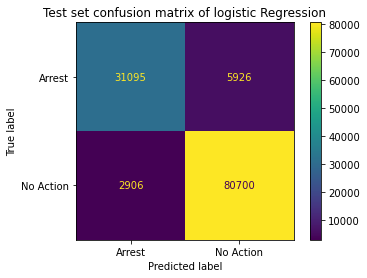

In [43]:
from sklearn.metrics import plot_confusion_matrix

# Plot the confusion matrix for the test set for the logistic Regression
plt.figure()
plot_confusion_matrix(log_reg, X_test, y_test, display_labels=encoder.classes_)
plt.title('Test set confusion matrix of logistic Regression')
plt.show()

In [44]:
#Print Classifacation Report 
y_pred_test_log_reg = log_reg.predict(X_test)
print(classification_report(y_test, y_pred_test_log_reg , target_names=['Arrest', 'No Arrest']))

              precision    recall  f1-score   support

      Arrest       0.91      0.84      0.88     37021
   No Arrest       0.93      0.97      0.95     83606

    accuracy                           0.93    120627
   macro avg       0.92      0.90      0.91    120627
weighted avg       0.93      0.93      0.93    120627



# Fairness Metrices for Regression

<Figure size 432x288 with 0 Axes>

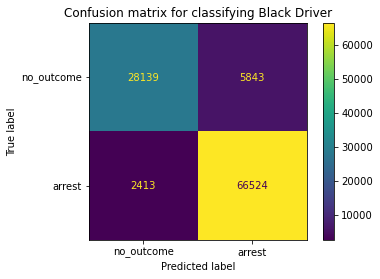

<Figure size 432x288 with 0 Axes>

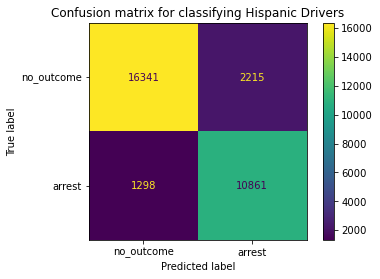

In [45]:
y_true = data_encoded_selected['stop_outcome']
y_pred_log_reg = log_reg.predict(data_encoded_selected.drop('stop_outcome', axis=1))

group_a = data_encoded_selected['driver_race_Black'] == 1
group_b = data_encoded_selected['driver_race_Hispanic'] == 1

cm_a = confusion_matrix(y_true[group_a], y_pred_log_reg[group_a])
cm_b = confusion_matrix(y_true[group_b], y_pred_log_reg[group_b])

tn_a, fp_a, fn_a, tp_a = cm_a.ravel()
tn_b, fp_b, fn_b, tp_b = cm_b.ravel()


plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix=cm_a, display_labels=['no_outcome','arrest'])
disp.plot()
#plt.xticks(rotation=30)
plt.grid(False)
plt.title("Confusion matrix for classifying Black Driver")
plt.show()

plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix=cm_b, display_labels=['no_outcome','arrest'])
disp.plot()
#plt.xticks(rotation=30)
plt.grid(False)
plt.title("Confusion matrix for classifying Hispanic Drivers")
plt.show()

# Dummy Classifier

In [46]:
#Create and test the DummyClassifier Model
from sklearn.dummy import DummyClassifier

dclf = DummyClassifier(strategy = 'constant', random_state = 35, constant = 1)
dclf.fit(X_train, y_train)

score = dclf.score(X_test, y_test)
print('Dummy Classifier Score: {:.4f}'.format(score))

## conclusion:
# desicion tree & logistic regression models are both better than dummy classifier
# both models making good prediction on the stop outcome based on all variable

Dummy Classifier Score: 0.6931
